Google Play Store has approximately 1.1 million applications and below is the link where I found the project. This dataset collection is as recent as early December 2020. The purpose for this is to see what are the different cases that makes the app to have high or low rating. Is it due to price? In app purchases? or Reviews? This analysis overall can help the stakeholders make decisions on what direction that they want to go with the apps in the google play store. Also, the overall goal of this analysis to generate revenue and maximize profit for the play store by providing ads with the apps. This can help create buzz on the apps in the play store and make the google play store the place to go to downaload applications.  

Before we try to form our hypothesis, we need to import the libraries that are necessary for this project. Also, since our dataset is a CSV file, we need to read the file, create a dataframe, and look at the first five values to check if it all works.

Link : [www.kaggle.com/gauthamp10/google-playstore-apps](https://www.kaggle.com/gauthamp10/google-playstore-apps)


In [ ]:
# To keep the page oraganized, import all the libraires 
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
sns.set()
# Suppress Warnings (otherwise the code won't exceute properly) 
import warnings
warnings.filterwarnings("ignore")

# Create the dataframe for the google play store label as gps.df
gps_df = pd.read_csv('/content/gdrive/My Drive/MOD 36/Google-Playstore.csv')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# check to see the first five values
gps_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,2.7M,2.3 and up,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,5.8M,4.1 and up,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,59M,4.4 and up,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,29M,5.0 and up,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


Look at the information from this dataset. Begin to doing some data exploration.

In [ ]:
# info about the dataset
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

Looking the information from the dataset, there are 23 columns 

Let's observe the null values.

In [ ]:
# Observe null values
gps_df.isnull().values
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

Besides two columns, all the columns are in the similar area of dataset values. Developer Website and Privacy Policy are the columns that have much smaller dataset values than the other columns. The reason might be is that there are  lots of missing values in those columns. 

To fix that, we can drop those two columns since it is not necessary for our hypotheses and use the variable new_gps_df for our new dataset.

In [ ]:
new_gps_df = gps_df.drop(['Developer Website', 'Privacy Policy'], axis = 1)
new_gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1118135 non-null  object 
 1   App Id            1118136 non-null  object 
 2   Category          1118133 non-null  object 
 3   Rating            1111286 non-null  float64
 4   Rating Count      1111286 non-null  float64
 5   Installs          1117975 non-null  object 
 6   Minimum Installs  1117975 non-null  float64
 7   Maximum Installs  1118136 non-null  int64  
 8   Free              1118136 non-null  bool   
 9   Price             1118136 non-null  float64
 10  Currency          1117975 non-null  object 
 11  Size              1118136 non-null  object 
 12  Minimum Android   1116123 non-null  object 
 13  Developer Id      1118134 non-null  object 
 14  Developer Email   1118114 non-null  object 
 15  Released          1110406 non-null  object 
 16  

Now, with Developer Website and Privacy Policy being drop, there are not equal amount of dataset values in each column. There are likely missing values in these columns as well therefore we need to drop the null values to clean the dataset. 

clean_gps_df is the variable to use when to drop the null values in the dataset.

In [ ]:
clean_gps_df = new_gps_df.dropna()
clean_gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108302 entries, 0 to 1118135
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1108302 non-null  object 
 1   App Id            1108302 non-null  object 
 2   Category          1108302 non-null  object 
 3   Rating            1108302 non-null  float64
 4   Rating Count      1108302 non-null  float64
 5   Installs          1108302 non-null  object 
 6   Minimum Installs  1108302 non-null  float64
 7   Maximum Installs  1108302 non-null  int64  
 8   Free              1108302 non-null  bool   
 9   Price             1108302 non-null  float64
 10  Currency          1108302 non-null  object 
 11  Size              1108302 non-null  object 
 12  Minimum Android   1108302 non-null  object 
 13  Developer Id      1108302 non-null  object 
 14  Developer Email   1108302 non-null  object 
 15  Released          1108302 non-null  object 
 16  

Now the dataset is clean and the values are matching. 

Just to be curious, let's see how many unqiue values are there per column. 

In [ ]:
# Number of unique values per column in this dataset
clean_gps_df.nunique()

App Name            1037544
App Id              1108302
Category                 48
Rating                   42
Rating Count          34744
Installs                 22
Minimum Installs         22
Maximum Installs     206335
Free                      2
Price                   702
Currency                 54
Size                   1481
Minimum Android         137
Developer Id         164538
Developer Email      259091
Released               3963
Last Updated           3679
Content Rating            6
Ad Supported              2
In App Purchases          2
Editors Choice            2
dtype: int64

Before we start running our hypothesis, let us see the stats for the app rating column since it will be our dependent variable.

In [ ]:
clean_gps_df['Rating'].describe()

count    1.108302e+06
mean     2.490893e+00
std      2.053989e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.600000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

The average rating for the apps are about 2.5 which makes sense because overall it is a 5 rating scale. 

# **Case 1: Price**

Now, we can form our hypothesis by providing the formula and what it represents. Here are our hypothesis for the first case:

### H_o = mu_1 - mu_2 = 0 (equal zero)

### H_a = mu_1 - mu_2 != 0 (not equal zero)

Our **null hypothesis** [H_o] represents that there is no significant difference with the app ratings based on the two different price ranges. 

Our **alternative hypothesis** [H_a] represents that there is significant difference with the app ratings based on the two different price ranges.

Also, we are dealing with a 95% confidence interval therefore:

### alpha = .05

**Note:** the 95% confidence interval including the alpha goes for the other two cases as well.

Once we have formula in place, we try to test the first case which is if the app ratings has an effect if the price of the app is free or not. 

First, create a variable called F and that will represent the applications that are free to downaload at the playstore.

In [ ]:
F = clean_gps_df.iloc[(clean_gps_df['Price'] == 0).values]
F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062234 entries, 0 to 1118135
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1062234 non-null  object 
 1   App Id            1062234 non-null  object 
 2   Category          1062234 non-null  object 
 3   Rating            1062234 non-null  float64
 4   Rating Count      1062234 non-null  float64
 5   Installs          1062234 non-null  object 
 6   Minimum Installs  1062234 non-null  float64
 7   Maximum Installs  1062234 non-null  int64  
 8   Free              1062234 non-null  bool   
 9   Price             1062234 non-null  float64
 10  Currency          1062234 non-null  object 
 11  Size              1062234 non-null  object 
 12  Minimum Android   1062234 non-null  object 
 13  Developer Id      1062234 non-null  object 
 14  Developer Email   1062234 non-null  object 
 15  Released          1062234 non-null  object 
 16  

From doing that calculation, there is a overwhleming majority of these apps that are free to download.

Next, create another variable labeled NF. That will represent not free apps and you will have to pay the price of the app before you can download it.

In [ ]:
NF = clean_gps_df.iloc[(clean_gps_df['Price'] != 0).values]
NF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46068 entries, 20 to 1117809
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App Name          46068 non-null  object 
 1   App Id            46068 non-null  object 
 2   Category          46068 non-null  object 
 3   Rating            46068 non-null  float64
 4   Rating Count      46068 non-null  float64
 5   Installs          46068 non-null  object 
 6   Minimum Installs  46068 non-null  float64
 7   Maximum Installs  46068 non-null  int64  
 8   Free              46068 non-null  bool   
 9   Price             46068 non-null  float64
 10  Currency          46068 non-null  object 
 11  Size              46068 non-null  object 
 12  Minimum Android   46068 non-null  object 
 13  Developer Id      46068 non-null  object 
 14  Developer Email   46068 non-null  object 
 15  Released          46068 non-null  object 
 16  Last Updated      46068 non-null  obj

There are a small amount of applications that have pricing. 

Now we can look at the stats for the ratings since it is our primary focus of this analysis.

In [ ]:
# Stats for the ratings for apps that are free
F['Rating'].describe()

count    1.062234e+06
mean     2.505969e+00
std      2.049358e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.600000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Although, there is a majority of apps that are free, these apps produce an avg. rating of 2.5 out of 5. 

In [ ]:
# stats for the ratings for apps that are not free
NF['Rating'].describe()

count    46068.000000
mean         2.143262
std          2.128622
min          0.000000
25%          0.000000
50%          2.600000
75%          4.300000
max          5.000000
Name: Rating, dtype: float64

Here, small amount of apps that have a price and the avg. rating is 2.14 so its lower than the apps that were free. 

Once we look at the stats, we can run a t-test for our two independent samples. The t-test can help us determine if we can reject or fail to reject our hypothesis 

In [ ]:
# Ratings is our dependent variable while our independent variables are apps that are Free labeled F and apps that are not free labeled NF
stats.ttest_ind(F['Rating'], NF['Rating'])

Ttest_indResult(statistic=37.128585633970616, pvalue=1.4921294321482818e-301)

It seems that our p-value is very small than our alpha therefore we can reject the null hypothesis therefore accepting our alternative. The alternative states that there is significant difference with the app ratings based on two different price ranges.



We also need calculations for the two samples in order to visually understand when create a graph. We need:

* Mean   
* Variance
* Observations [the sample size]
* Standard Error
* Confidence Inteval [Upper and Lower]


In [ ]:
# Calculations for F['Rating']
M1 = F['Rating'].mean()
V1 = F['Rating'].var()
O1 = F['Rating'].count()
Se1 = math.sqrt((V1)/(O1)) # Formula is the sqrt of the variance (V1) divided by the observation size (O1)
print("The mean for F['Rating'] is {}".format(M1))
print("The variance for F['Rating'] is {}".format(V1))
print("The observations for F['Rating'] is {}".format(O1))
print("The Standard error for F['Rating'] is {}".format(Se1))

The mean for F['Rating'] is 2.505969306197579
The variance for F['Rating'] is 4.199870113099153
The observations for F['Rating'] is 1062234
The Standard error for F['Rating'] is 0.0019884186625637977


In [ ]:
# Calculations for NF['Rating']
M2 = NF['Rating'].mean()
V2 = NF['Rating'].var()
O2 = NF["Rating"].count()
Se2 = math.sqrt((V2)/(O2))
print("The mean for NF['Rating'] is {}".format(M2))
print("The variance for NF['Rating'] is {}".format(V2))
print("The observations for NF['Rating'] is {}".format(O2))
print("The Standard error for NF['Rating'] is {}".format(Se2))

The mean for NF['Rating'] is 2.1432621342363385
The variance for NF['Rating'] is 4.531032161126899
The observations for NF['Rating'] is 46068
The Standard error for NF['Rating'] is 0.00991742428038587


Now in order to get our Confidence Intervals (lower and upper) we need a few calulations: 

*   Mean difference between our two samples 
*   Standard error of difference
*   Margin of error

Use a definiton function called ```get_95_ci()``` to have all the calculations under one roof. 

In [ ]:
def get_95_ci(array_1, array_2): 
    sample_1_n = array_1.shape[0]  # Represents our two samples
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean() # Represents our means for the two samples
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()   # Variance for our two samples
    mean_difference = sample_1_mean - sample_2_mean  # Difference b/w our means
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n)) # Standrd error difference b/w our two samples
    margin_of_error = 1.96 * std_err_difference # 1.96 represents are 95% C.I. (two-tailed) for the t-test formula
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(F['Rating'], NF['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.34288217034664503 and 0.38253217357583635.'

Now after all the calculations I can create a barplot using the seaborn library.

We will compare the price column to the ratings column.

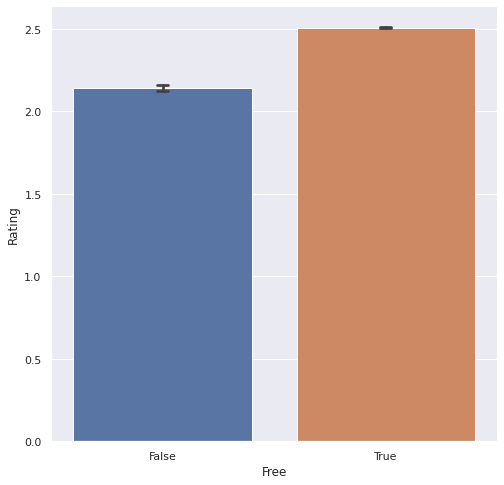

In [ ]:
plt.figure(figsize=(8,8)) # To make the graph a bit bigger.
sns.barplot(x = "Free", y = "Rating" , data = clean_gps_df, ci = 95, capsize= .05) 

From the graph above: 

x = Apps that are Free  

y = Rating of the apps

True --> Free apps 

False --> Not Free apps

In the graph, the free apps tend to have a higher rating compared to the ones that have a price. It makes sense because it is a free app so people will tend to give a higher rating but, its only a 2.5 rating so that indicates it is probably a decent app at best. 

The apps that have a price tend to have a lower rating. The reason that maybe is that people wasted their money for the apps that was not working correctly or just poorly developed. 
Also, in the graph we have the error bars to be small since our c.i. calculations were small as well.

# **Case 2: In App Purchases**

We look at one case with the app ratings based on two different price ranges. Now, we can look at other insights for the app ratings.  

Our next case would be does app ratings have an effect if there is in app purchases aka the Freemium Model?

Hypothesis (same formula):

### H_o = mu_1 - mu_2 = 0 

### H_a = mu_1 - mu_2 != 0


**Null hypothesis:** the app ratings has no significant difference based on in app purchases. 

**Alternative hypothesis:** the app ratings has significant difference based on in app purchases.

First, create variable Free_Mod which will represent the values in the dataset that have in app purchases.

In [ ]:
Free_Mod = clean_gps_df.loc[(clean_gps_df["In App Purchases"] == True).values]
Free_Mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118581 entries, 1 to 1118129
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          118581 non-null  object 
 1   App Id            118581 non-null  object 
 2   Category          118581 non-null  object 
 3   Rating            118581 non-null  float64
 4   Rating Count      118581 non-null  float64
 5   Installs          118581 non-null  object 
 6   Minimum Installs  118581 non-null  float64
 7   Maximum Installs  118581 non-null  int64  
 8   Free              118581 non-null  bool   
 9   Price             118581 non-null  float64
 10  Currency          118581 non-null  object 
 11  Size              118581 non-null  object 
 12  Minimum Android   118581 non-null  object 
 13  Developer Id      118581 non-null  object 
 14  Developer Email   118581 non-null  object 
 15  Released          118581 non-null  object 
 16  Last Updated      1

These are the results of the dataset where there are in app purchases.

Next, Not_Free_Mod is the variable where we will find the values that have no in app purchases.

In [ ]:
Not_Free_Mod = clean_gps_df.loc[(clean_gps_df['In App Purchases'] == False).values]
Not_Free_Mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989721 entries, 0 to 1118135
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          989721 non-null  object 
 1   App Id            989721 non-null  object 
 2   Category          989721 non-null  object 
 3   Rating            989721 non-null  float64
 4   Rating Count      989721 non-null  float64
 5   Installs          989721 non-null  object 
 6   Minimum Installs  989721 non-null  float64
 7   Maximum Installs  989721 non-null  int64  
 8   Free              989721 non-null  bool   
 9   Price             989721 non-null  float64
 10  Currency          989721 non-null  object 
 11  Size              989721 non-null  object 
 12  Minimum Android   989721 non-null  object 
 13  Developer Id      989721 non-null  object 
 14  Developer Email   989721 non-null  object 
 15  Released          989721 non-null  object 
 16  Last Updated      9

This is a much bigger dataset of the apps that do not have in app purchases compare to the ones that do have in app purchases.

Now, let's look at the statistics of the ratings.

In [ ]:
# Rating Stats for the in app purchases (Free_Mod)
Free_Mod['Rating'].describe()

count    118581.000000
mean          3.594815
std           1.413069
min           0.000000
25%           3.600000
50%           4.100000
75%           4.400000
max           5.000000
Name: Rating, dtype: float64

Avg. rating for the app is 3.59 so it is a pretty high rating for apps that have in app purchases.

In [ ]:
# Rating Stats for the not in app purchases (Not_Free_Mod)
Not_Free_Mod['Rating'].describe()

count    989721.000000
mean          2.358629
std           2.078848
min           0.000000
25%           0.000000
50%           3.400000
75%           4.300000
max           5.000000
Name: Rating, dtype: float64

A 2.36 avg rating is low for in app purchases.

Now, calculate the independent t-test for the two samples.

In [ ]:
# samples: Free_Mod and Not_Free_Mod
stats.ttest_ind(Free_Mod['Rating'], Not_Free_Mod['Rating'])

Ttest_indResult(statistic=199.32801113087348, pvalue=0.0)

Well, it turns out the p-value is extremely small therefore it shows the value to zero. To conclude, we can reject the null hypothesis and accepting the alternative which is that there is a significant change with the app ratings based on in app purchases. 

Now we can calculate the mean, variance, standard error, and confidence intervals for these two samples.

In [ ]:
# Free_Mod calculations:
M1B = Free_Mod['Rating'].mean() # B represents the second case of this analysis.
V1B = Free_Mod['Rating'].var()
O1B = Free_Mod['Rating'].count()
Se1B = math.sqrt(V1B/O1B)
print("The mean for Free_Mod['Rating'] is {}".format(M1B))
print("The variance for Free_Mod['Rating'] is {}".format(V1B))
print("The observations for Free_Mod['Rating'] is {}".format(O1B))
print("The standard error for Free_Mod['Rating'] is {}".format(Se1B))

The mean for Free_Mod['Rating'] is 3.5948145149729287
The variance for Free_Mod['Rating'] is 1.9967632100287431
The observations for Free_Mod['Rating'] is 118581
The standard error for Free_Mod['Rating'] is 0.004103512199716179


In [ ]:
# Not_Free_Mod calculations:
M2B = Not_Free_Mod['Rating'].mean()
V2B = Not_Free_Mod['Rating'].var()
O2B = Not_Free_Mod['Rating'].count()
Se2B = math.sqrt(V2B/O2B)
print("The mean for Not_Free_Mod['Rating'] is {}".format(M2B))
print("The variance for Not_Free_Mod['Rating'] is {}".format(V2B))
print("The observations for Not_Free_Mod['Rating'] is {}".format(O2B))
print("The standard error for Not_Free_Mod['Rating'] is {}".format(Se2B))

The mean for Not_Free_Mod['Rating'] is 2.358629250061007
The variance for Not_Free_Mod['Rating'] is 4.321608519515976
The observations for Not_Free_Mod['Rating'] is 989721
The standard error for Not_Free_Mod['Rating'] is 0.0020896152008378324


For the Confidence Interval we have the definition function ```get_95_ci()``` so we do need to repeat those calculations.



In [ ]:
get_95_ci(Free_Mod['Rating'], Not_Free_Mod['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between 1.2271596183378561 and 1.245210911485987.'

After the calcuations were found, let's make a plot to explain the dynamics for these two independent samples.

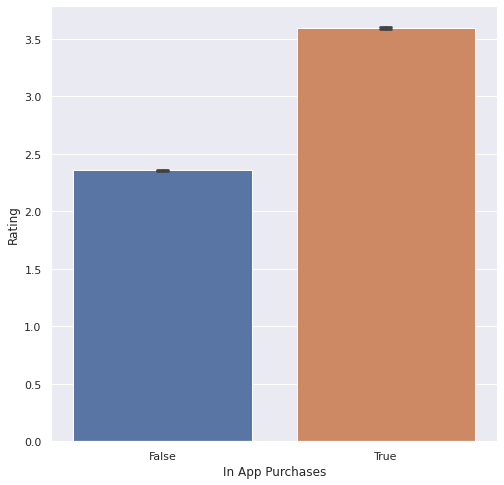

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x= "In App Purchases", y = "Rating", data = clean_gps_df, ci = 95, capsize = .05)

In the graph above:

x = In App Purchases

y = Rating

True --> In app purchases (Freemium model)

False --> Not in app purchases (Not Freemium model)

Our error bars are small since our c.i. calculations are 

The true graph has a much higher rating because people are addictied to buy things in a free app that can help them in the long run. For example, game apps have a freemium model where you pay to get extra coins in order to use them for the game objective. 

The false graph has a much lower rating and the reason is that people may tend to want to buy things in an app but there is no in app purchases therefore people may give not a good review of the app. Also, people may not just care about in app purchase at all and still give a bad review anyway.   

# **Case 3: People's Reviews**

Does the app ratings have any significant difference with the amount of people's reviews?

Hypothesis:

### H_o = mu_1 - mu_2 = 0 

### H_a = mu_1 - mu_2 != 0


**Null hypothesis:** the app ratings has no significant difference based on people's reviews 

**Alternative hypothesis:** the app ratings has significant difference based on people's reviews



People Reviews would be the Rating Count column in our clean_gps_df. In here, we can see that stats of this specific column.

In [ ]:
clean_gps_df['Rating Count'].describe()

count    1.108302e+06
mean     4.970444e+03
std      2.528717e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.000000e+02
max      1.253808e+08
Name: Rating Count, dtype: float64

We can see that the avg Rating's Count about 4970.44 per app.

Round this up to 5000 so we can analyze the apps that have underperformed or exceeded based upon this rounded average.

In [ ]:
# Above_5000 is the amount of reviews of the app that is exceeded.
Above_5000 = clean_gps_df.iloc[(clean_gps_df['Rating Count'] >= 5000).values]
Above_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46861 entries, 1 to 1118103
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App Name          46861 non-null  object 
 1   App Id            46861 non-null  object 
 2   Category          46861 non-null  object 
 3   Rating            46861 non-null  float64
 4   Rating Count      46861 non-null  float64
 5   Installs          46861 non-null  object 
 6   Minimum Installs  46861 non-null  float64
 7   Maximum Installs  46861 non-null  int64  
 8   Free              46861 non-null  bool   
 9   Price             46861 non-null  float64
 10  Currency          46861 non-null  object 
 11  Size              46861 non-null  object 
 12  Minimum Android   46861 non-null  object 
 13  Developer Id      46861 non-null  object 
 14  Developer Email   46861 non-null  object 
 15  Released          46861 non-null  object 
 16  Last Updated      46861 non-null  obje

Looks like a small dataset that were above 5000 reviews per app.



In [ ]:
# Below_5000 is the amount of reviews of the app that underperformed.
Below_5000 = clean_gps_df.iloc[(clean_gps_df['Rating Count'] < 5000).values]
Below_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061441 entries, 0 to 1118135
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1061441 non-null  object 
 1   App Id            1061441 non-null  object 
 2   Category          1061441 non-null  object 
 3   Rating            1061441 non-null  float64
 4   Rating Count      1061441 non-null  float64
 5   Installs          1061441 non-null  object 
 6   Minimum Installs  1061441 non-null  float64
 7   Maximum Installs  1061441 non-null  int64  
 8   Free              1061441 non-null  bool   
 9   Price             1061441 non-null  float64
 10  Currency          1061441 non-null  object 
 11  Size              1061441 non-null  object 
 12  Minimum Android   1061441 non-null  object 
 13  Developer Id      1061441 non-null  object 
 14  Developer Email   1061441 non-null  object 
 15  Released          1061441 non-null  object 
 16  

Looks like there is an overwhelming majority of apps that people did not review enough of and it's under the 5000 review avg.


Let's look at the stats for our two samples.

In [ ]:
Above_5000['Rating'].describe()

count    46861.000000
mean         4.177250
std          0.431387
min          1.100000
25%          4.000000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

Small dataset but, it has higher ratings for the apps.

In [ ]:
Below_5000['Rating'].describe()

count    1.061441e+06
mean     2.416443e+00
std      2.065386e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.500000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Large dataset but, poor ratings for the apps.

Now calculate the t-test for the two independent samples.

In [ ]:
stats.ttest_ind(Above_5000['Rating'], Below_5000['Rating'])

Ttest_indResult(statistic=184.3733683887774, pvalue=0.0)

The p-value in this case is extremely small therefore we can reject the null hypothesis and accepting our alternative. The alternative is that there is a significant difference with the ratings based on people's review of the apps.

Let us get the mean, variance, standard error, and confidence intervals for these two samples. 

In [ ]:
# Above_5000 calculations:
M1C = Above_5000['Rating'].mean() # C is the third case of this analysis.
V1C = Above_5000['Rating'].var()
O1C = Above_5000['Rating'].count()
Se1C = math.sqrt(V1C/O1C)
print("The mean for Above_5000['Rating'] is {}".format(M1C))
print("The variance for Above_5000['Rating'] is {}".format(V1C))
print("The observations for Above_5000['Rating'] is {}".format(O1C))
print("The standard error for Above_5000['Rating'] is {}".format(Se1C))

The mean for Above_5000['Rating'] is 4.177249738588655
The variance for Above_5000['Rating'] is 0.186094663813696
The observations for Above_5000['Rating'] is 46861
The standard error for Above_5000['Rating'] is 0.00199278838851993


In [ ]:
# Below_5000 calculations:
M2C = Below_5000['Rating'].mean()
V2C = Below_5000['Rating'].var()
O2C = Below_5000['Rating'].count()
Se2C = math.sqrt(V2C/O2C)
print("The mean for Below_5000['Rating'] is {}".format(M2C))
print("The variance for Below_5000['Rating'] is {}".format(V2C))
print("The observations for Below_5000['Rating'] is {}".format(O2C))
print("The standard error for Below_5000['Rating'] is {}".format(Se2C))


The mean for Below_5000['Rating'] is 2.416442835729459
The variance for Below_5000['Rating'] is 4.265821216012265
The observations for Below_5000['Rating'] is 1061441
The standard error for Below_5000['Rating'] is 0.0020047184874050624


Now the Confidence Interval using the ``` get_95_ci``` def function.



In [ ]:
get_95_ci(Above_5000['Rating'], Below_5000['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between 1.7552666163161128 and 1.766347189402279.'

Now, in order to create a bar plot, I need to create a new column in the dataset to put all the values of the Rating Count that are above 5000. Made a new column in the clean_gps_df dataset called Above_5000 and that will be a condition statement of the Ratings Count column. 

It states the values in the Rating Count column that are over 5000.


In [ ]:
# New column with the condtion statement
clean_gps_df['Above_5000'] = (clean_gps_df['Rating Count'] >= 5000)

# Look at the first five values and comapre it to the Rating Count column
clean_gps_df[['Above_5000', 'Rating Count']].head()

,Above_5000,Rating Count
0,False,2848.0
1,True,17297.0
2,True,488639.0
3,True,1224420.0
4,False,665.0


After writing the condition statement, it outputs the true and false values to the correct values.

Now create the barplot of this new column with our ratings.

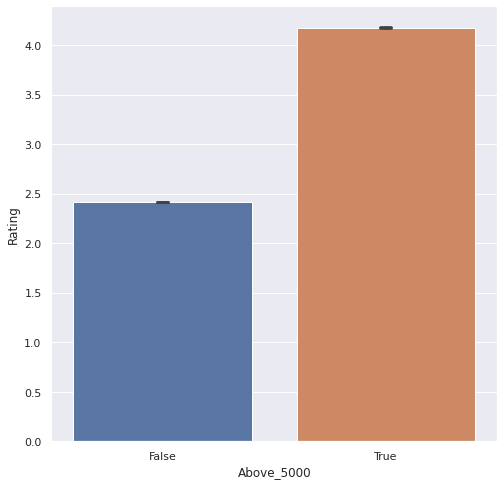

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = "Above_5000", y = "Rating", data = clean_gps_df, ci = 95, capsize=.05)

In the graph above: 

x = Above_5000

y = Rating

True --> App Reviews that are over 5000 

False --> App Reviews that are under 5000

**Note**: these are per individual apps. 


The true graph has a much smaller dataset but has the highest overall rating. This is probably because of the apps have overall a good quality will tend to have higher ratings even though the amount is much smaller. People tend to review good quality apps and it attracts more people to buy it. 

The false graph has a large dataset and lower overall rating. The reason may be is that people tend not to care about reviewing the apps because people did review them already. Also, in this case less reviewed apps tend to be ignored by the genereal audience because people may need more reviews on the app in order to convince them to actually downaload it.  

# **Overall Conclusion**



After looking at these three cases, I begin to understand that in the google play store, there are millions if not billions of applications that are downloaded. Once people can have the overall understanding of the apps that they have downloaded, then they will give their opinion of the app by rating them. People love to give their opinions, good or bad on the app that they are using. To reiterate, the objective of this analysis is to generate revenue for the applications in the play store and to maximize profit. With these three cases, the stakeholders can make more of a cohesive decision that can help not just the indiviual apps be successful but, the google play store overall the #1 place to get applications. More recognition of the play store not only will lead to more and more revenue it will generate trust in the audience of how efficient it is.

If I were to give a recommendation, I would say that the apps that are highly rated and reviewed to give them more of a spotlight in the play store so people can see how the app is trending. You can make ads on those apps that are trending in the play store so it can get lots more traffic towards that app. As long as the ad best represents the app's features. After the stakeholders can make their decision based on the analysis,  they will discuss with the executives which will go down to the developers of the google play store to create ads that can create enough buzz for the apps. 

These cases that I analyzed does make me understand of what apps are tending and doing well in the play store. Also, it makes me realize of the apps that are poorly reviewed and being disregarded in the play store. In the end, app ratings can help me analyze how the process goes on the google play store and the apps that gains more popularity as time goes on. 
 